### Librerias 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import re, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.stats import normaltest

### **Preprocesamiento de datos**

In [2]:
archivo = 'C:/Users/camil/Desktop/TESIS/Datos/Prueba/Final.xlsx'
df = pd.read_excel(archivo, sheet_name='Hoja1')
df

,Page,Imagen,Experiment,Code,Valence,Domain,Arousal
0,1,Carabineros,EX2,EX2-1,1.0,9.0,5.0
1,1,Carabineros,EX2,EX2-2,3.0,8.0,8.0
2,1,Carabineros,EX2,EX2-3,1.0,8.0,NaN
3,1,Carabineros,EX2,EX2-4,1.0,9.0,8.0
4,1,Carabineros,EX2,EX2-5,1.0,9.0,8.0
...,...,...,...,...,...,...,...
8875,10,SHOA,EX1,EX1-4,5.0,9.0,9.0
8876,10,SHOA,EX1,EX1-5,6.0,9.0,9.0
8877,10,SHOA,EX1,EX1-6,3.0,7.0,7.0
8878,10,SHOA,EX1,EX1-7,4.0,7.0,8.0


#### Exploración de datos

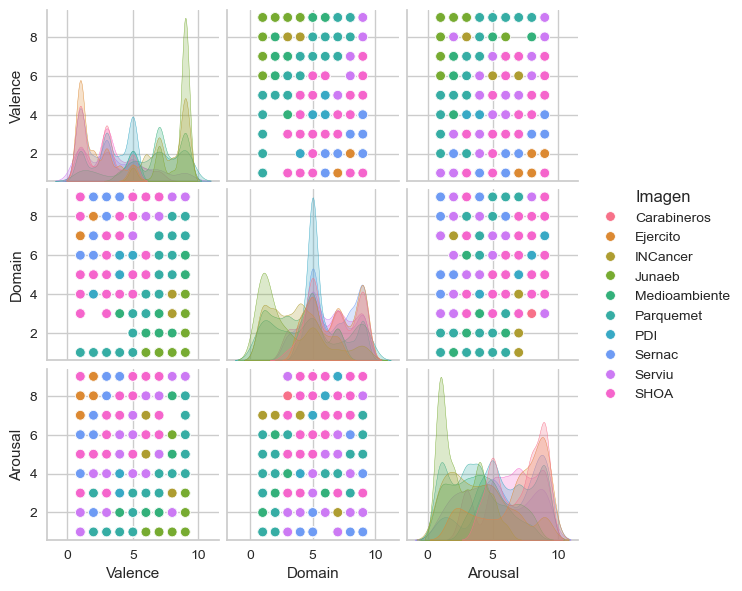

In [3]:
sns.pairplot(df.drop(['Page', 'Experiment', 'Code'], axis = 1), hue='Imagen', height=2)

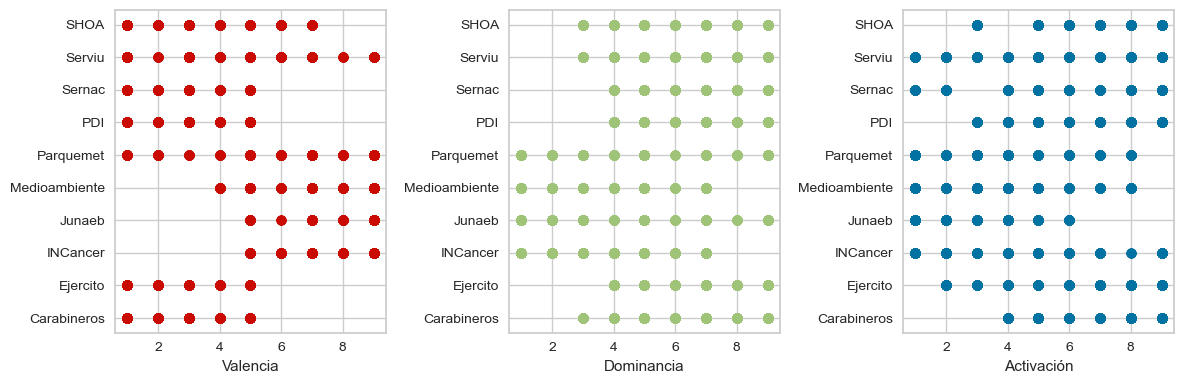

In [4]:
plt.rcParams["figure.figsize"] = (12,4)
plt.subplot(1,3,1)
var1 = 'Valence'
data1 = pd.concat([df['Imagen'], df[var1]], axis=1)
plt.scatter(x=data1[var1], y=data1['Imagen'], alpha = 0.5, c='r');
plt.xlabel('Valencia')

plt.subplot(1,3,2)
var2 = 'Domain'
data2 = pd.concat([df['Imagen'], df[var2]], axis=1)
plt.scatter(x=data2[var2], y=data2['Imagen'], alpha = 0.5, c='g');
plt.xlabel('Dominancia')

plt.subplot(1,3,3)
var3 = 'Arousal'
data3 = pd.concat([df['Imagen'], df[var3]], axis=1)
plt.scatter(x=data3[var3], y=data3['Imagen'], alpha = 0.5);
plt.xlabel('Activación')

plt.tight_layout()

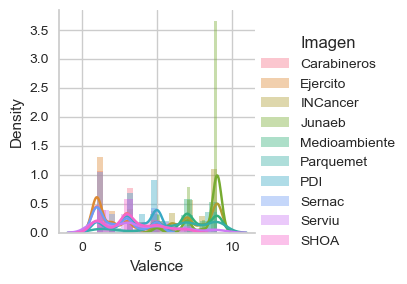

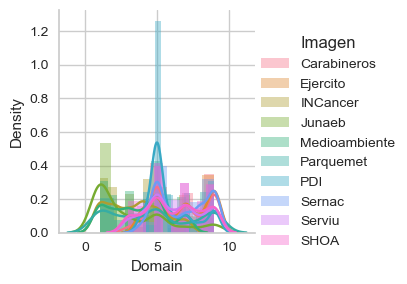

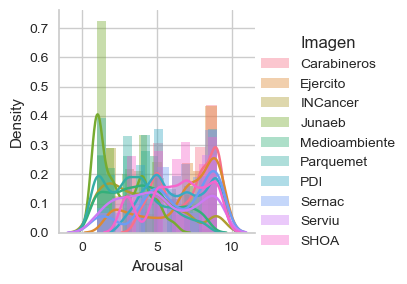

In [5]:
import warnings
warnings.filterwarnings('ignore')
plot = sns.FacetGrid(df, hue="Imagen")
plot.map(sns.distplot, "Valence").add_legend()
plot = sns.FacetGrid(df, hue="Imagen")
plot.map(sns.distplot, "Domain").add_legend()
plot = sns.FacetGrid(df, hue="Imagen")
plot.map(sns.distplot, "Arousal").add_legend()

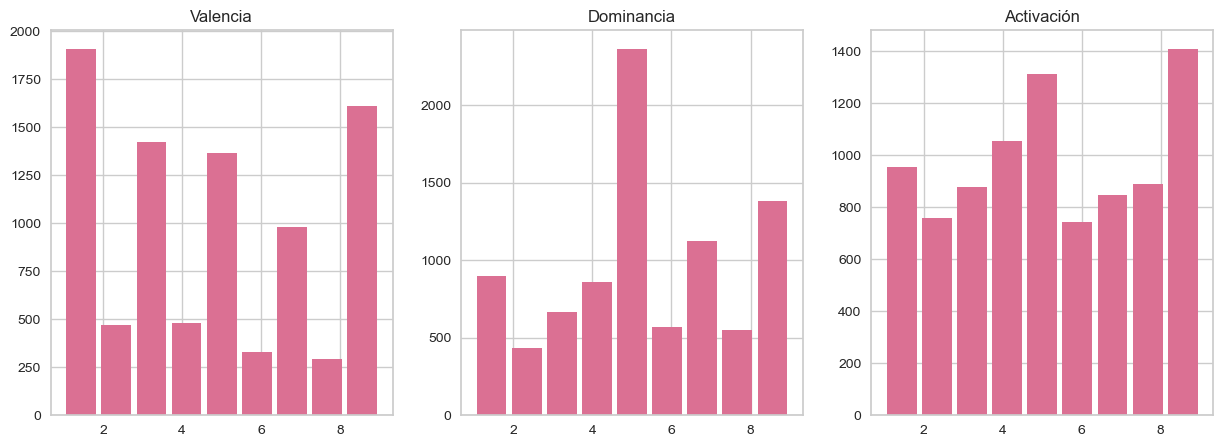

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].set_title("Valencia")
axes[0].hist(df['Valence'], bins=9, color='palevioletred', rwidth=0.85)
axes[1].set_title("Dominancia")
axes[1].hist(df['Domain'], bins=9,color='palevioletred', rwidth=0.85);
axes[2].set_title("Activación")
axes[2].hist(df['Arousal'], bins=9, color='palevioletred', rwidth=0.85);

In [7]:
stat1, p1 = normaltest(df['Valence'])
stat2, p2 = normaltest(df['Domain'])
stat3, p3 = normaltest(df['Arousal'])
# Test de Diagnostico Valencia 
print('VALENCIA:', 'Estadisticos=%.3f, p=%.3f' % (stat1, p1))
if p1 > 0.05: print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else: print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')
# Test de Diagnostico Valencia 
print('DOMINANCIA', 'Estadisticos=%.3f, p=%.3f' % (stat2, p2))
if p2 > 0.05: print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else: print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')
# Test de Diagnostico Valencia 
print('Activación', 'Estadisticos=%.3f, p=%.3f' % (stat3, p3))
if p3 > 0.05: print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else: print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

VALENCIA: Estadisticos=nan, p=nan
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
DOMINANCIA Estadisticos=nan, p=nan
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Activación Estadisticos=nan, p=nan
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


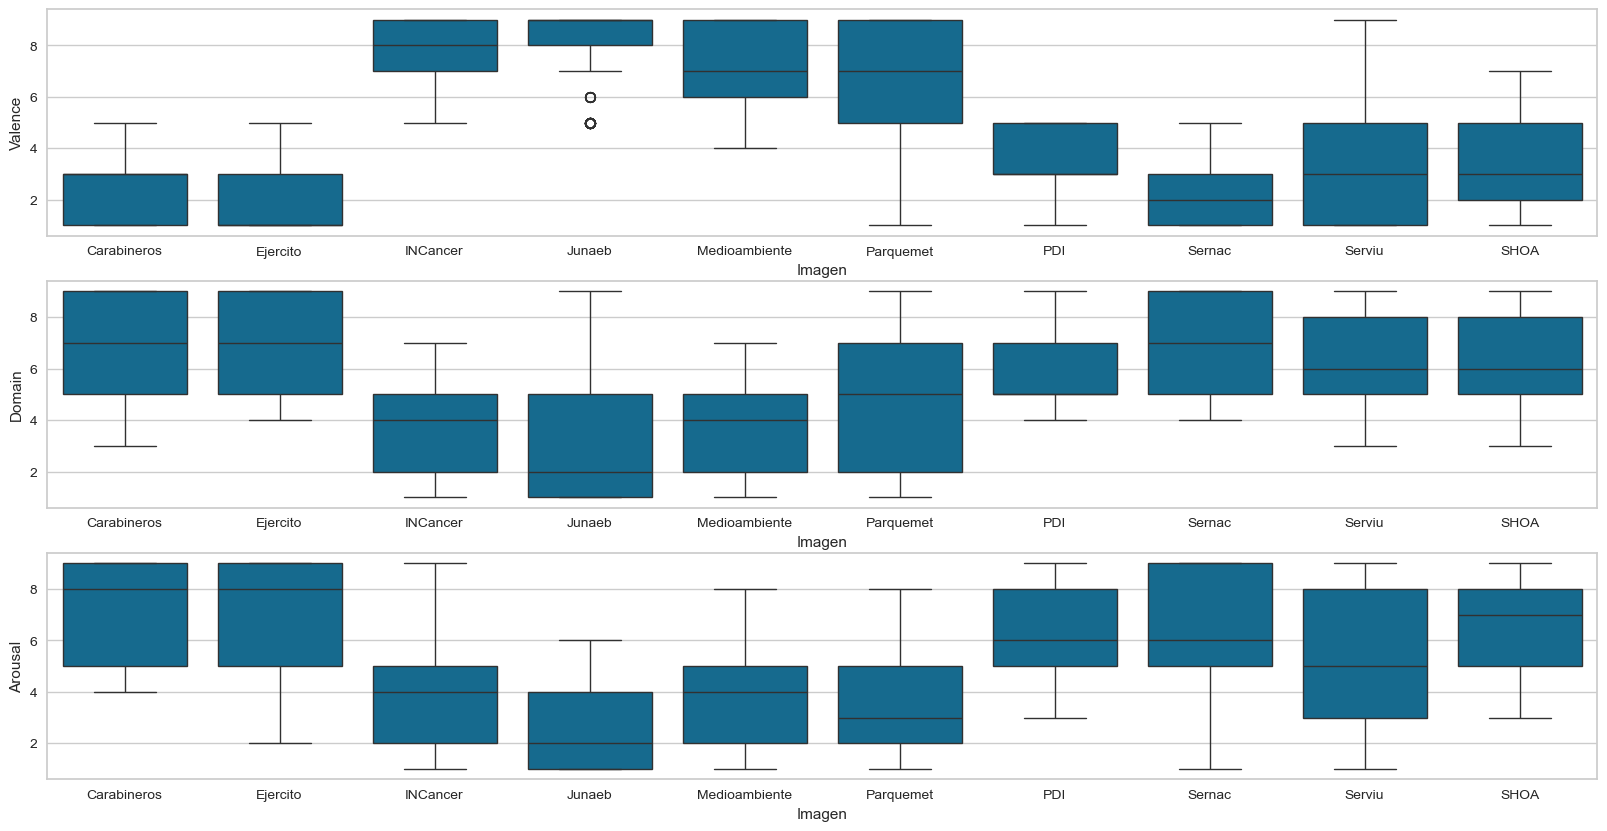

In [8]:
def graph(y):
    sns.boxplot(x="Imagen", y=y, data=df)
 
plt.figure(figsize=(20,10))
plt.subplot(311)
graph('Valence')
plt.subplot(312)
graph('Domain')
plt.subplot(313)
graph('Arousal')
plt.show()

##### Análisis de datos 

In [9]:
print(f"El máximo de valencia es {df['Valence'].max()} y el mínimo es {df['Valence'].min()}")
print(f"El máximo de dominancia es {df['Domain'].max()} y el mínimo es {df['Domain'].min()}")
print(f"El máximo de activación es {df['Arousal'].max()} y el mínimo es {df['Arousal'].min()}")
df.info()

El máximo de valencia es 9.0 y el mínimo es 1.0
El máximo de dominancia es 9.0 y el mínimo es 1.0
El máximo de activación es 9.0 y el mínimo es 1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Page        8880 non-null   int64  
 1   Imagen      8880 non-null   object 
 2   Experiment  8880 non-null   object 
 3   Code        8880 non-null   object 
 4   Valence     8862 non-null   float64
 5   Domain      8847 non-null   float64
 6   Arousal     8854 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 485.8+ KB


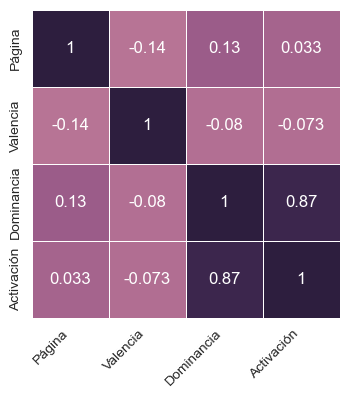

In [10]:
corr_matrix = df.corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.heatmap(corr_matrix, annot = True, cbar = False, annot_kws = {"size": 12},vmin = -1, vmax = 1, center = 0, cmap = sns.cubehelix_palette(as_cmap=True),
    square = True,ax = ax,
            xticklabels=['Página','Valencia','Dominancia','Activación'],
            yticklabels=['Página','Valencia','Dominancia','Activación'], linewidths=0.7,linecolor="white")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right')
ax.tick_params(labelsize = 10)
plt.rcParams["figure.figsize"]=(12,5)

##### Limpieza de datos 

In [11]:
#Datos perdidos:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Domain,33,0.003716
Arousal,26,0.002928
Valence,18,0.002027
Page,0,0.000000
Imagen,0,0.000000
Experiment,0,0.000000
Code,0,0.000000


In [12]:
df = df.drop(df.loc[df['Valence'].isnull()].index)
df = df.drop(df.loc[df['Arousal'].isnull()].index)
df = df.drop(df.loc[df['Domain'].isnull()].index)
df.isnull().sum().max()

0

In [13]:
print(f"Los datos duplicados son en total {df.duplicated().sum()}")
print(f"Los datos duplicados son {df.duplicated}")
df.drop_duplicates()

Los datos duplicados son en total 0
Los datos duplicados son <bound method DataFrame.duplicated of       Page       Imagen Experiment   Code  Valence  Domain  Arousal
0        1  Carabineros        EX2  EX2-1      1.0     9.0      5.0
1        1  Carabineros        EX2  EX2-2      3.0     8.0      8.0
3        1  Carabineros        EX2  EX2-4      1.0     9.0      8.0
4        1  Carabineros        EX2  EX2-5      1.0     9.0      8.0
5        1  Carabineros        EX2  EX2-6      5.0     5.0      5.0
...    ...          ...        ...    ...      ...     ...      ...
8875    10         SHOA        EX1  EX1-4      5.0     9.0      9.0
8876    10         SHOA        EX1  EX1-5      6.0     9.0      9.0
8877    10         SHOA        EX1  EX1-6      3.0     7.0      7.0
8878    10         SHOA        EX1  EX1-7      4.0     7.0      8.0
8879    10         SHOA        EX1  EX1-8      6.0     9.0      9.0

[8809 rows x 7 columns]>


,Page,Imagen,Experiment,Code,Valence,Domain,Arousal
0,1,Carabineros,EX2,EX2-1,1.0,9.0,5.0
1,1,Carabineros,EX2,EX2-2,3.0,8.0,8.0
3,1,Carabineros,EX2,EX2-4,1.0,9.0,8.0
4,1,Carabineros,EX2,EX2-5,1.0,9.0,8.0
5,1,Carabineros,EX2,EX2-6,5.0,5.0,5.0
...,...,...,...,...,...,...,...
8875,10,SHOA,EX1,EX1-4,5.0,9.0,9.0
8876,10,SHOA,EX1,EX1-5,6.0,9.0,9.0
8877,10,SHOA,EX1,EX1-6,3.0,7.0,7.0
8878,10,SHOA,EX1,EX1-7,4.0,7.0,8.0


In [14]:
#Eliminación de columnas irrelevantes
df.drop('Experiment', axis = 'columns', inplace = True)
df.drop('Imagen', axis = 'columns', inplace = True)
df.drop('Code', axis = 'columns', inplace = True)

##### Transformación de datos

In [15]:
df['Domain'] = df['Domain'].astype('int64')
df['Arousal'] = df['Arousal'].astype('int64')
df['Valence'] = df['Valence'].astype('int64')
print(df.dtypes)
df

Page       int64
Valence    int64
Domain     int64
Arousal    int64
dtype: object


,Page,Valence,Domain,Arousal
0,1,1,9,5
1,1,3,8,8
3,1,1,9,8
4,1,1,9,8
5,1,5,5,5
...,...,...,...,...
8875,10,5,9,9
8876,10,6,9,9
8877,10,3,7,7
8878,10,4,7,8


### Kmeans 

In [16]:
X = df.drop('Page', axis=1)
Y = df['Page']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0, stratify= Y)

In [17]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Valence,Domain,Arousal
0,0.00,1.000,0.500
1,0.25,0.875,0.875
2,0.00,1.000,0.875
3,0.00,1.000,0.875
4,0.50,0.500,0.500


#### Método para k 

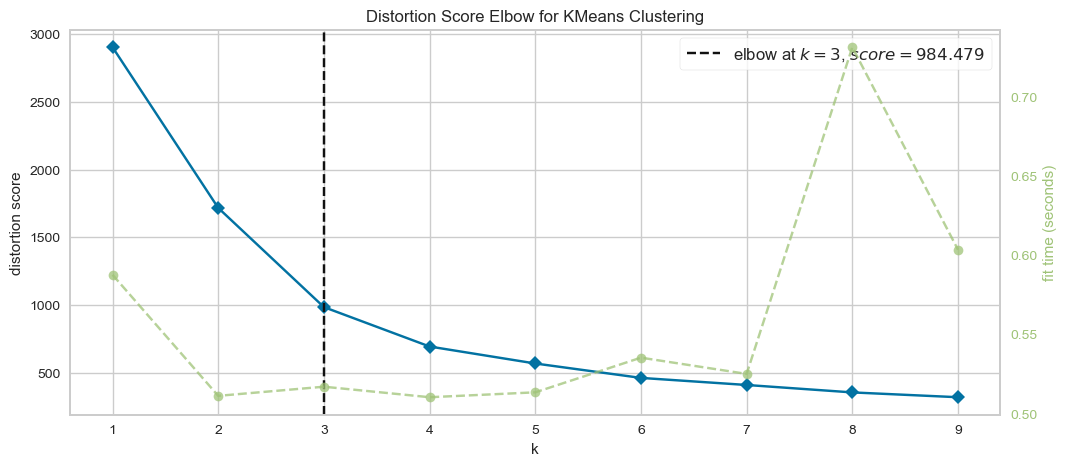

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_df)
visualizer.show()

### Primer método k=3

In [19]:
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y = k_means_optimum.fit_predict(X)
print(y)

[0 1 1 ... 1 1 1]


In [20]:
colnames = list(df.columns[0:])
colnames

['Page', 'Valence', 'Domain', 'Arousal']

In [21]:
colnames = list(df.columns[0:])
def initiate_centroids(k, dset):
    centroids = dset.sample(k)
    return centroids
np.random.seed(42)
k=3
df = df[['Valence','Domain','Arousal']]
centroids = initiate_centroids(k, df)
centroids

,Valence,Domain,Arousal
5043,7,5,3
3436,9,4,4
4574,7,3,4


##### Distancia

In [22]:
def rsserr(a,b):
    return np.square(np.sum((a-b)**2))

In [23]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[4574,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 4.00
Error for centroid 1: 16.00
Error for centroid 2: 1.00


In [24]:
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(n):
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)
    return assignation, assign_errors

In [25]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

,Valence,Domain,Arousal,centroid,error
0,1,9,5,0,3136.0
1,3,8,8,0,2500.0
3,1,9,8,0,5929.0
4,1,9,8,0,5929.0
5,5,5,5,0,64.0


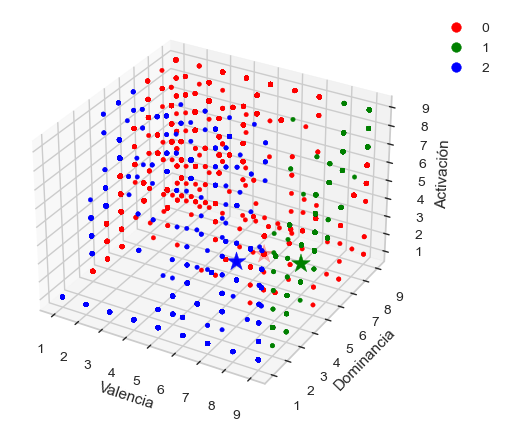

In [26]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
customcmap = ListedColormap([ "red","green","blue"])
kmedia = ax.scatter(df.iloc[:,0], df.iloc[:,1],df.iloc[:,2] , c=df['centroid'].astype('category'), marker='o', cmap=customcmap, s=10, alpha=1)
centroi= ax.scatter(centroids.iloc[:,0], centroids.iloc[:,1], centroids.iloc[:,2], marker = '*', s=200, c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel('Valencia')
ax.set_ylabel('Dominancia')
ax.set_zlabel('Activación')
plt.legend(*kmedia.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [27]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 10998895.00


In [28]:
def kmeans(dset, k=3, tol=1e-4):
    working_dset = dset.copy()
    err = []
    goahead = True
    j = 0
    centroids = initiate_centroids(k, dset)
    while(goahead):
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
        if j>0:
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1
    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

In [29]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['Valence','Domain','Arousal']], 3)
df.head()

,Valence,Domain,Arousal,centroid,error
0,1,9,5,0,166.210562
1,3,8,8,0,9.832713
3,1,9,8,0,119.336100
4,1,9,8,0,119.336100
5,5,5,5,0,100.145598


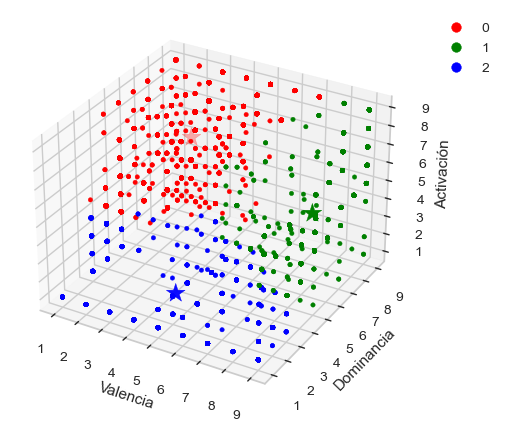

In [30]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
kmedia = ax.scatter(df.iloc[:,0], df.iloc[:,1],df.iloc[:,2] , c=df['centroid'].astype('category'), marker='o', cmap=customcmap, s=10, alpha=1)
centroi= ax.scatter(centroids.iloc[:,0], centroids.iloc[:,1], centroids.iloc[:,2], marker = '*', s=200, c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel('Valencia')
ax.set_ylabel('Dominancia')
ax.set_zlabel('Activación')
plt.legend(*kmedia.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [31]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 1081279.90


In [32]:
centroids.iloc[:,0]

0    3.033572
1    8.475577
2    4.950193
Name: Valence, dtype: float64

In [33]:
centroids.iloc[:,1]

0    6.672948
1    5.798175
2    2.291541
Name: Domain, dtype: float64

In [34]:
centroids.iloc[:,2]

0    6.828027
1    5.283951
2    1.927866
Name: Arousal, dtype: float64

In [35]:
copy =  pd.DataFrame()
copy['Page']=Y
copy['label'] = df['centroid'];
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cluster']= ['1','2','3']
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cluster,cantidad
0,1,4617
1,2,1863
2,3,2329


In [36]:
print("Cantidad de datos en el grupo 1 por logotipo")
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Page']=[0,1,2,3,4,5,6,7,8,9,10,11]
diversidadGrupo['cantidad']=group_referrals.groupby('Page').size()
diversidadGrupo

Cantidad de datos en el grupo 1 por logotipo


,Page,cantidad
0,0,NaN
1,1,851.0
2,2,756.0
3,3,8.0
4,4,2.0
5,5,12.0
6,6,18.0
7,7,823.0
8,8,784.0
9,9,626.0


In [37]:
print("Cantidad de datos en el grupo 2 por logotipo")
group_referrer_index = copy['label'] ==1
group_referrals = copy[group_referrer_index]
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Page']=[0,1,2,3,4,5,6,7,8,9,10,11]
diversidadGrupo['cantidad']=group_referrals.groupby('Page').size()
diversidadGrupo

Cantidad de datos en el grupo 2 por logotipo


,Page,cantidad
0,0,NaN
1,1,NaN
2,2,NaN
3,3,457.0
4,4,382.0
5,5,457.0
6,6,477.0
7,7,NaN
8,8,NaN
9,9,83.0


In [38]:
print("Cantidad de datos en el grupo 3 por logotipo")
group_referrer_index = copy['label'] ==2
group_referrals = copy[group_referrer_index]
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Page']=[0,1,2,3,4,5,6,7,8,9,10,11]
diversidadGrupo['cantidad']=group_referrals.groupby('Page').size()
diversidadGrupo

Cantidad de datos en el grupo 3 por logotipo


,Page,cantidad
0,0,NaN
1,1,31.0
2,2,124.0
3,3,417.0
4,4,499.0
5,5,411.0
6,6,385.0
7,7,52.0
8,8,100.0
9,9,174.0


In [39]:
closest, _ = pairwise_distances_argmin_min(k_means_optimum.cluster_centers_, X)
closest

array([5613,  536,  381], dtype=int64)

##### Valencia vs Dominancia

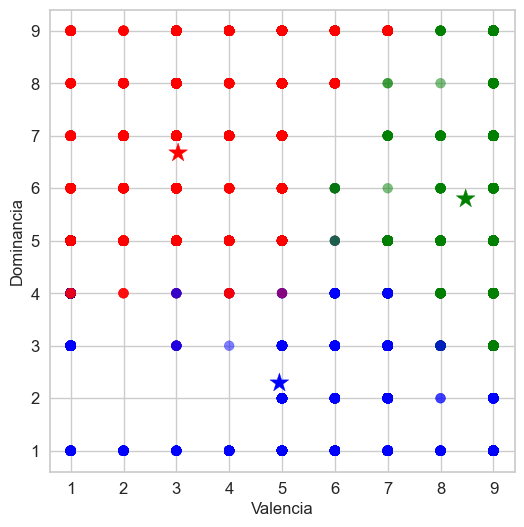

In [40]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', c=df['centroid'].astype('category'), cmap = customcmap, s=50, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = '*', s=200, c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'Valencia', fontsize=12)
ax.set_ylabel(r'Dominancia', fontsize=12)
plt.style.use("fivethirtyeight")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Dominancia vs activación

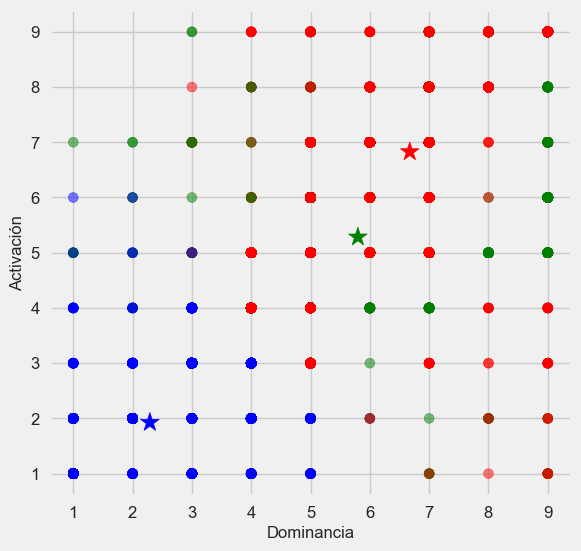

In [41]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(df.iloc[:,1], df.iloc[:,2],  marker = 'o', c=df['centroid'].astype('category'), cmap = customcmap, s=50, alpha=0.5)
plt.scatter(centroids.iloc[:,1], centroids.iloc[:,2], marker = '*', s=200, c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'Dominancia', fontsize=12)
ax.set_ylabel(r'Activación', fontsize=12)
plt.style.use("fivethirtyeight")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Valencia vs Activación 

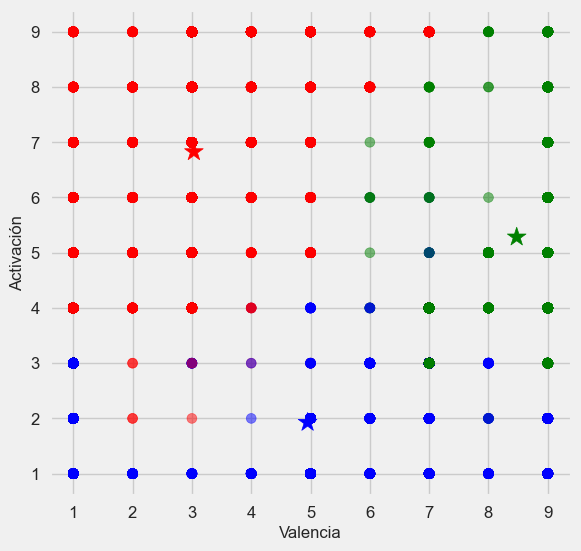

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,2],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=50, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,2],  
            marker = '*', s=200,
            c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'Valencia', fontsize=12)
ax.set_ylabel(r'Activación', fontsize=12)
plt.style.use("fivethirtyeight")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()